Imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle

Filter the data.

In [2]:
def filterData(data):
    filt_data = []
    dx = []
    lowest_loss = 1000
    for i, loss in enumerate(data):
        if loss < lowest_loss:
            lowest_loss = loss
            filt_data.append(loss)
            dx.append(i)
        else:
            continue
    return dx, filt_data

Load the data.

In [3]:
loss_base = []
with open('../data/losses/loss_base.pkl', 'rb') as f:
    loss_base = pickle.load(f)

loss_xc = []
loss_xxc = []
loss_rc = []
with open('../data/losses/loss_xc.pkl', 'rb') as f:
    loss_xc = pickle.load(f)
with open('../data/losses/loss_xxc.pkl', 'rb') as f:
    loss_xxc = pickle.load(f)
with open('../data/losses/loss_rc.pkl', 'rb') as f:
    loss_rc = pickle.load(f)

loss_xp = []
loss_xxp = []
with open('../data/losses/loss_xp.pkl', 'rb') as f:
    loss_xp = pickle.load(f)
with open('../data/losses/loss_xxp.pkl', 'rb') as f:
    loss_xxp = pickle.load(f)

loss_minp = []
loss_plusp = []
with open('../data/losses/loss_minp.pkl', 'rb') as f:
    loss_minp = pickle.load(f)
with open('../data/losses/loss_plusp.pkl', 'rb') as f:
    loss_plusp = pickle.load(f)

loss_plusp_xp = []
with open('../data/losses/loss_plusp_xp.pkl', 'rb') as f:
    loss_plusp_xp = pickle.load(f)

loss_base_2 = []
loss_base_2_tr = []
with open('../data/losses/loss_base_2.pkl', 'rb') as f:
    loss_base_2 = pickle.load(f)
with open('../data/losses/loss_base_2_tr.pkl', 'rb') as f:
    loss_base_2_tr = pickle.load(f)

loss_lch = []
loss_llch = []
loss_slch = []
loss_base_3 = []
with open('../data/losses/loss_lch.pkl', 'rb') as f:
    loss_lch = pickle.load(f)
with open('../data/losses/loss_llch.pkl', 'rb') as f:
    loss_llch = pickle.load(f)
with open('../data/losses/loss_slch.pkl', 'rb') as f:
    loss_slch = pickle.load(f)
with open('../data/losses/loss_base_3.pkl', 'rb') as f:
    loss_base_3 = pickle.load(f)


Plot the loss of the different convolution layers amount in the architecture.

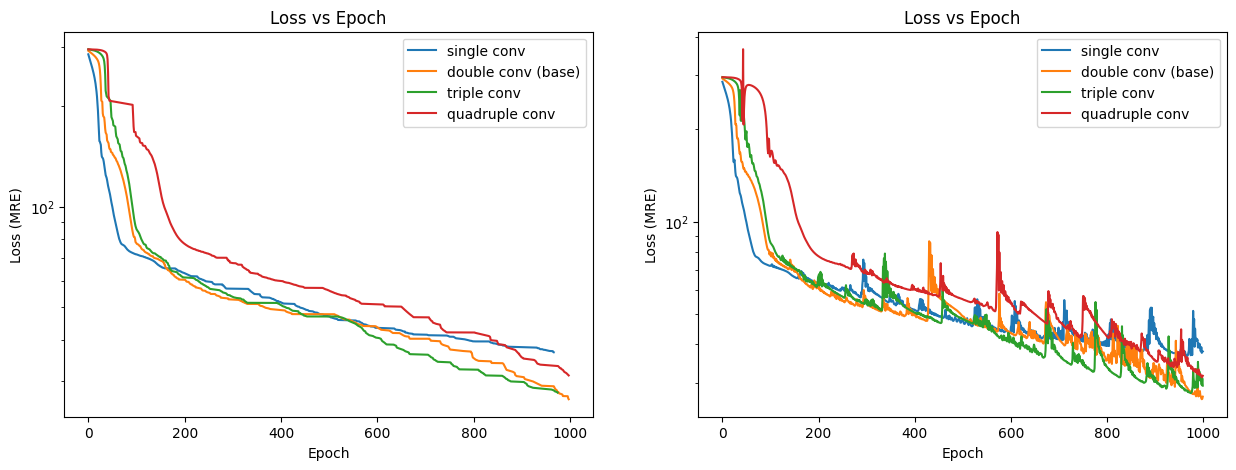

In [4]:
conv = plt.figure(figsize=(15, 5))
conv.tight_layout(pad=2.0)
ax = conv.add_subplot(121)
ax2 = conv.add_subplot(122)
dx, dy = filterData(loss_rc)
ax.plot(dx, dy, label='single conv')
dx, dy = filterData(loss_base)
ax.plot(dx, dy, label='double conv (base)')
dx, dy = filterData(loss_xc)
ax.plot(dx, dy, label='triple conv')
dx, dy = filterData(loss_xxc)
ax.plot(dx, dy, label='quadruple conv')

ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MRE)')
ax.set_title('Loss vs Epoch')

ax2.plot(loss_rc, label='single conv')
ax2.plot(loss_base, label='double conv (base)')
ax2.plot(loss_xc, label='triple conv')
ax2.plot(loss_xxc, label='quadruple conv')

ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (MRE)')
ax2.set_title('Loss vs Epoch')
plt.savefig('./loss_conv.png')
plt.show()

Plot the loss using different kernel sizes in the architecture.

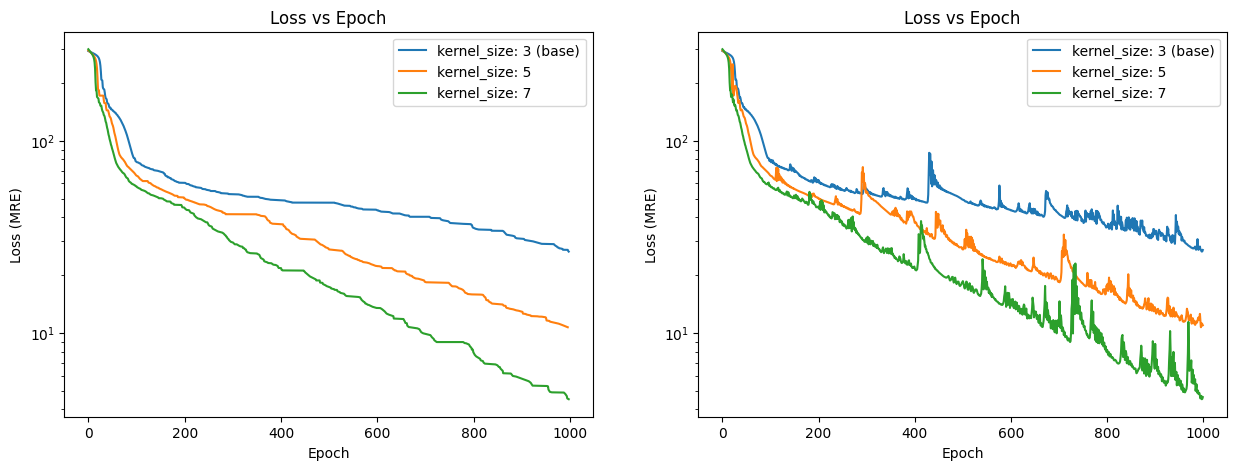

In [5]:
kern = plt.figure(figsize=(15, 5))
kern.tight_layout(pad=2.0)
ax = kern.add_subplot(121)
ax2 = kern.add_subplot(122)
dx, dy = filterData(loss_base)
ax.plot(dx, dy, label='kernel_size: 3 (base)')
dx, dy = filterData(loss_xp)
ax.plot(dx, dy, label='kernel_size: 5')
dx, dy = filterData(loss_xxp)
ax.plot(dx, dy, label='kernel_size: 7')

ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MRE)')
ax.set_title('Loss vs Epoch')

ax2.plot(loss_base, label='kernel_size: 3 (base)')
ax2.plot(loss_xp, label='kernel_size: 5')
ax2.plot(loss_xxp, label='kernel_size: 7')

ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (MRE)')
ax2.set_title('Loss vs Epoch')
plt.savefig('./loss_kern.png')
plt.show()

Plot the loss with different amount of pooling layers in the architecture.

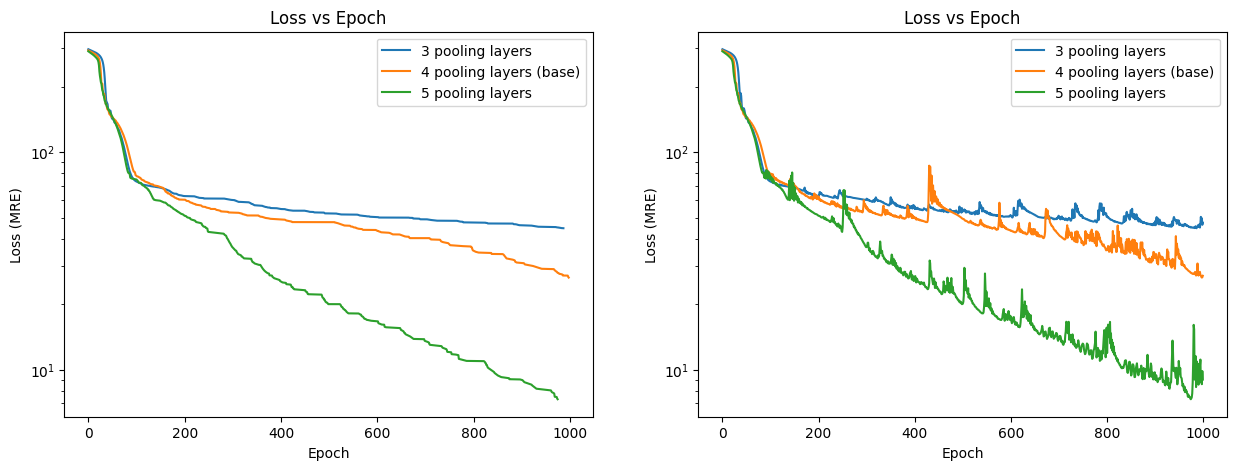

In [6]:
pool = plt.figure(figsize=(15, 5))
pool.tight_layout(pad=2.0)
ax = pool.add_subplot(121)
ax2 = pool.add_subplot(122)
dx, dy = filterData(loss_minp)
ax.plot(dx, dy, label='3 pooling layers')
dx, dy = filterData(loss_base)
ax.plot(dx, dy, label='4 pooling layers (base)')
dx, dy = filterData(loss_plusp)
ax.plot(dx, dy, label='5 pooling layers')

ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MRE)')
ax.set_title('Loss vs Epoch')

ax2.plot(loss_minp, label='3 pooling layers')
ax2.plot(loss_base, label='4 pooling layers (base)')
ax2.plot(loss_plusp, label='5 pooling layers')

ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (MRE)')
ax2.set_title('Loss vs Epoch')
plt.savefig('./loss_pool.png')
plt.show()

Plot the losses when combining two positive alterations.

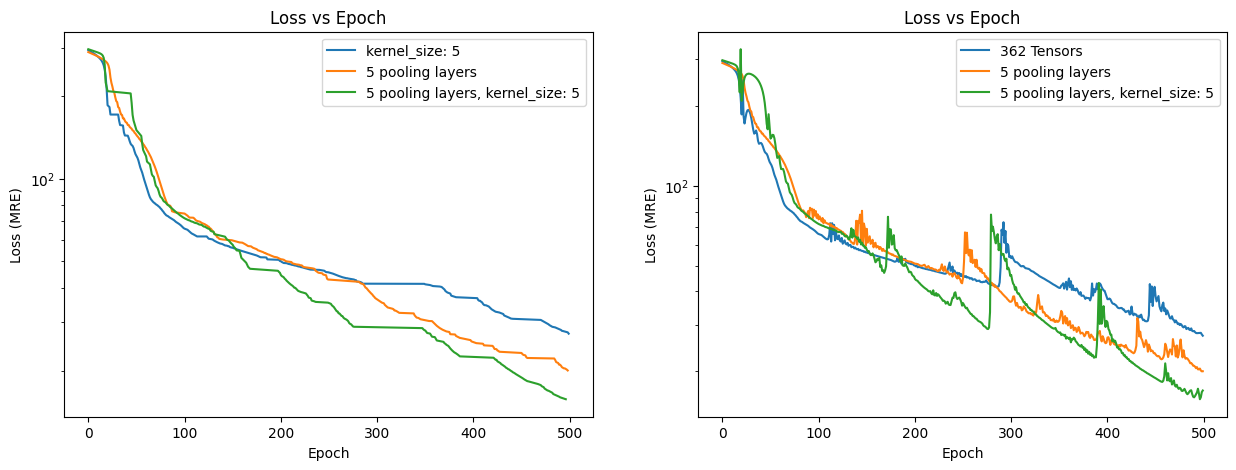

In [7]:
comb = plt.figure(figsize=(15, 5))
comb.tight_layout(pad=2.0)
ax = comb.add_subplot(121)
ax2 = comb.add_subplot(122)
dx, dy = filterData(loss_xp[:500])
ax.plot(dx, dy, label='kernel_size: 5')
dx, dy = filterData(loss_plusp[:500])
ax.plot(dx, dy, label='5 pooling layers')
dx, dy = filterData(loss_plusp_xp)
ax.plot(dx, dy, label='5 pooling layers, kernel_size: 5')

ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MRE)')
ax.set_title('Loss vs Epoch')

ax2.plot(loss_xp[:500], label='362 Tensors')
ax2.plot(loss_plusp[:500], label='5 pooling layers')
ax2.plot(loss_plusp_xp, label='5 pooling layers, kernel_size: 5')

ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (MRE)')
ax2.set_title('Loss vs Epoch')
plt.savefig('./loss_comb.png')
plt.show()

Plot the losses when swapping to another larger dataset.

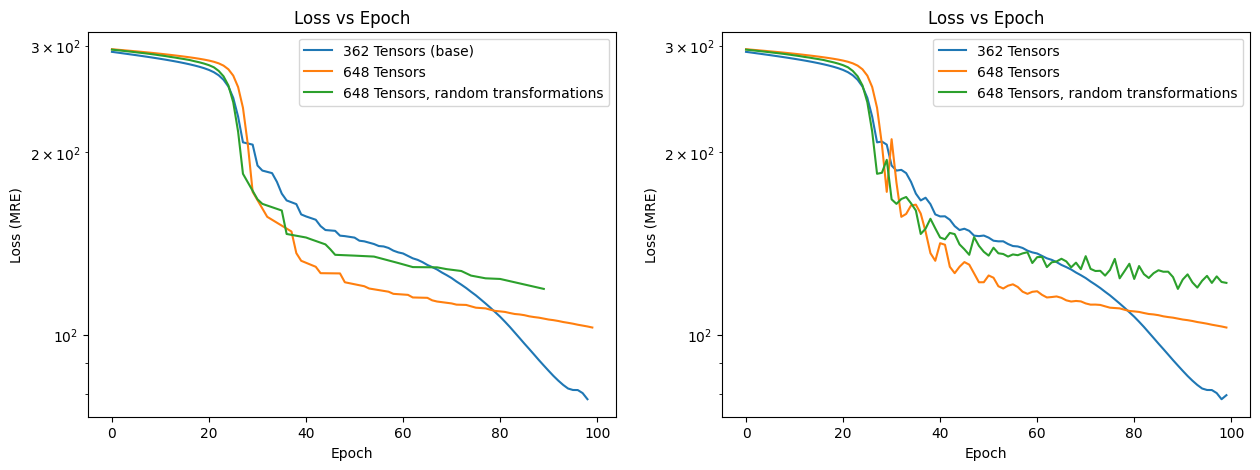

In [8]:
dtst = plt.figure(figsize=(15, 5))
dtst.tight_layout(pad=2.0)
ax = dtst.add_subplot(121)
ax2 = dtst.add_subplot(122)
dx, dy = filterData(loss_base[:100])
ax.plot(dx, dy, label='362 Tensors (base)')
dx, dy = filterData(loss_base_2)
ax.plot(dx, dy, label='648 Tensors')
dx, dy = filterData(loss_base_2_tr)
ax.plot(dx, dy, label='648 Tensors, random transformations')

ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MRE)')
ax.set_title('Loss vs Epoch')

ax2.plot(loss_base[:100], label='362 Tensors')
ax2.plot(loss_base_2, label='648 Tensors')
ax2.plot(loss_base_2_tr, label='648 Tensors, random transformations')

ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (MRE)')
ax2.set_title('Loss vs Epoch')
plt.savefig('./loss_dtst.png')
plt.show()

Plot the losses when changing the channel count in the model.

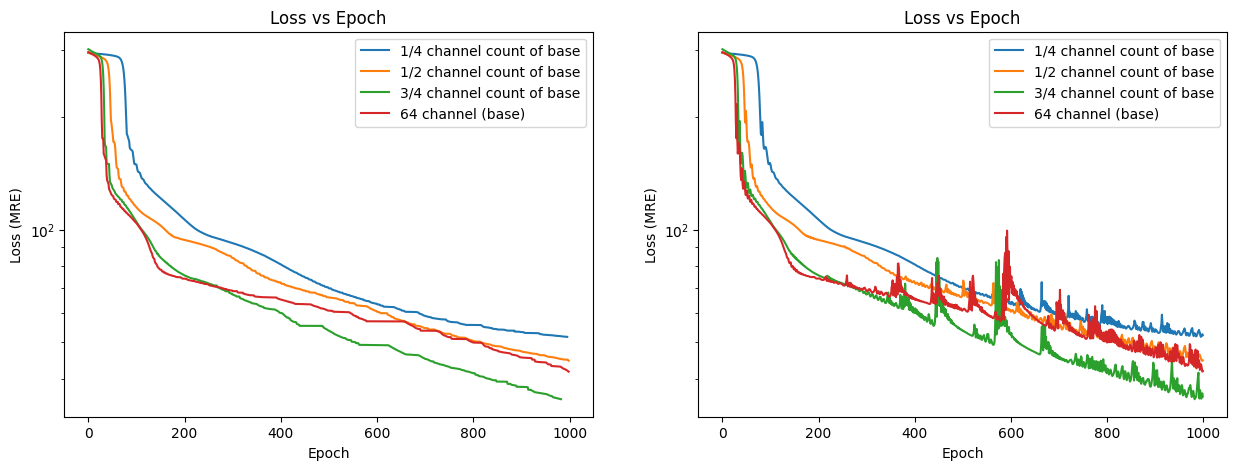

In [9]:
chct = plt.figure(figsize=(15, 5))
chct.tight_layout(pad=2.0)
ax = chct.add_subplot(121)
ax2 = chct.add_subplot(122)
dx, dy = filterData(loss_llch)
ax.plot(dx, dy, label='1/4 channel count of base')
dx, dy = filterData(loss_lch)
ax.plot(dx, dy, label='1/2 channel count of base')
dx, dy = filterData(loss_slch)
ax.plot(dx, dy, label='3/4 channel count of base')
dx, dy = filterData(loss_base_3)
ax.plot(dx, dy, label='64 channel (base)')

ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MRE)')
ax.set_title('Loss vs Epoch')

ax2.plot(loss_llch, label='1/4 channel count of base')
ax2.plot(loss_lch, label='1/2 channel count of base')
ax2.plot(loss_slch, label='3/4 channel count of base')
ax2.plot(loss_base_3, label='64 channel (base)')

ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (MRE)')
ax2.set_title('Loss vs Epoch')
plt.savefig('./loss_chct.png')
plt.show()

Plot the loss from the das experiments.

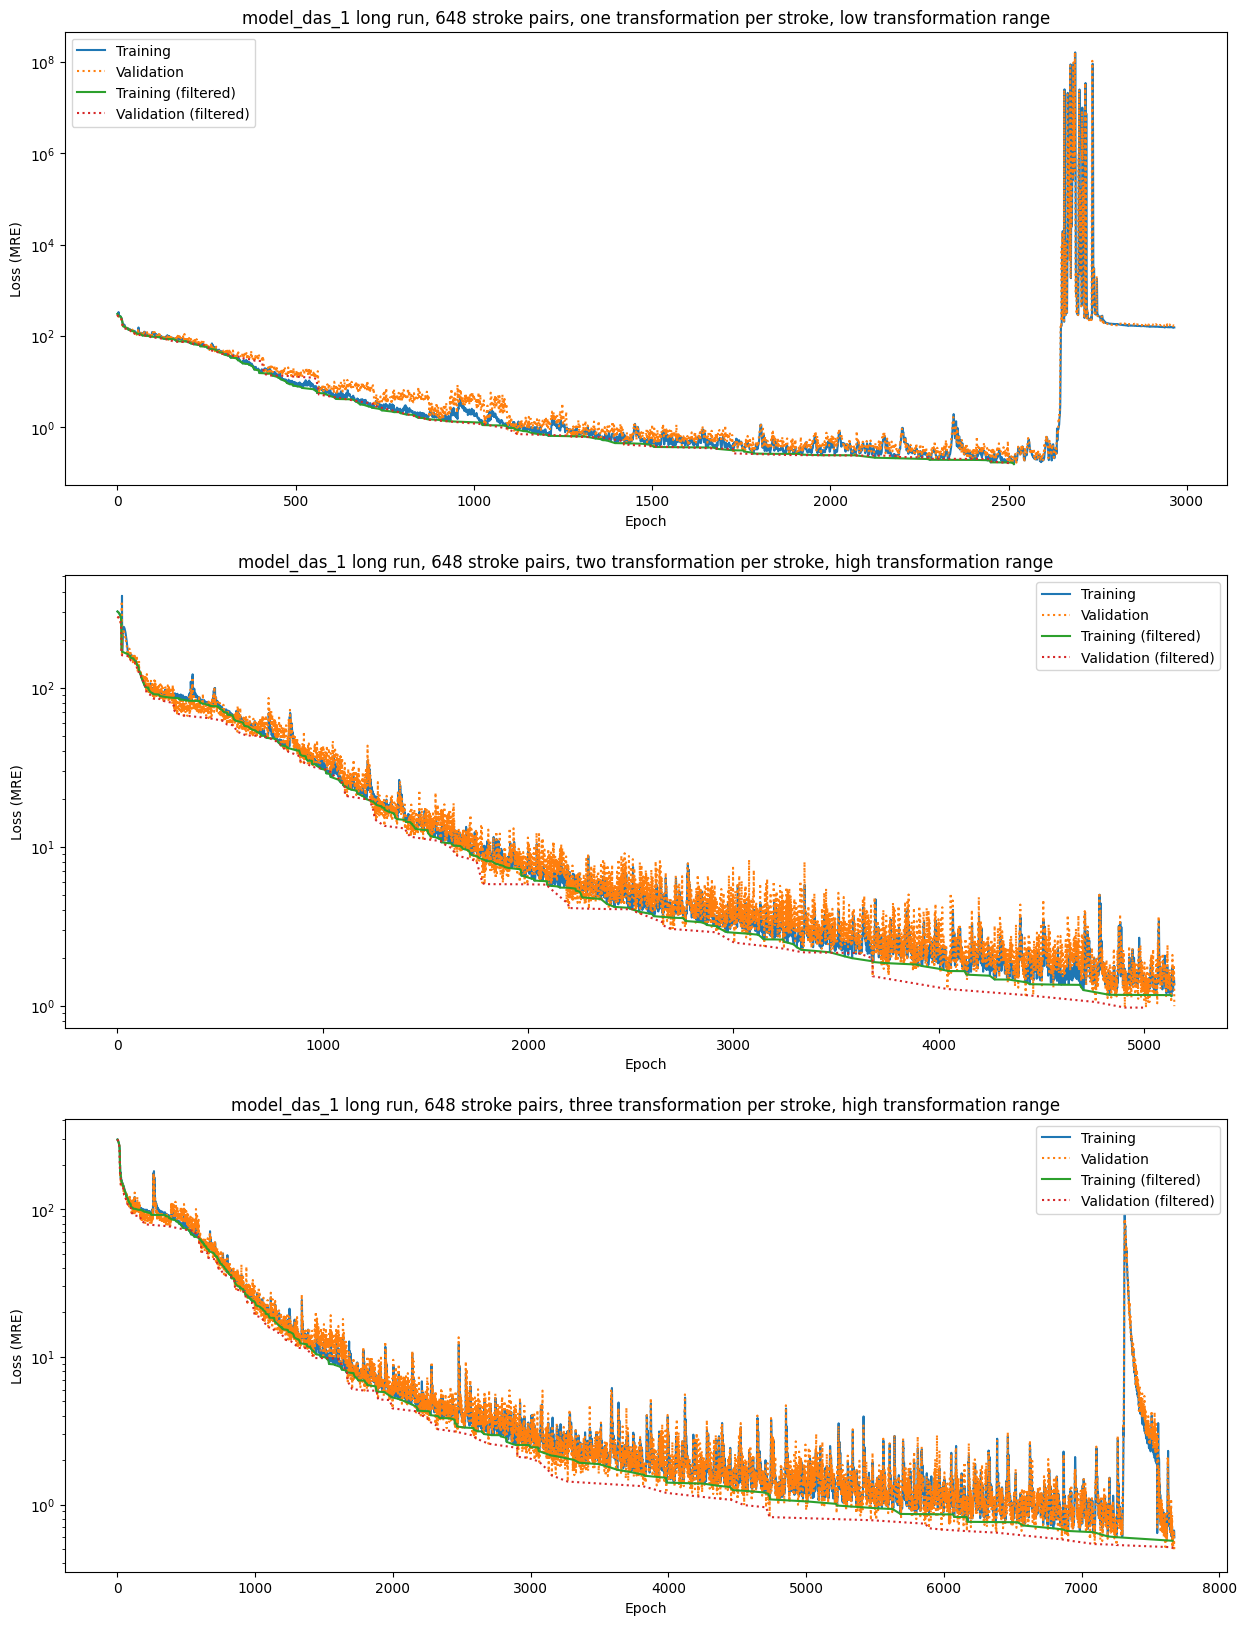

In [11]:
import pandas as pd

loss_das_one = pd.read_csv("../data/losses/csv/loss_das_1_1.csv", sep=', ', header=0, engine='python')
loss_das_two = pd.read_csv("../data/losses/csv/loss_das_1_2.csv", sep=', ', header=0, engine='python')
loss_das_three = pd.read_csv("../data/losses/csv/loss_das_1_3.csv", sep=', ', header=0, engine='python')

loss_das = plt.figure(figsize=(15, 20))
loss_das.tight_layout(pad=2.0)
ax = loss_das.add_subplot(311)
ax2 = loss_das.add_subplot(312)
ax3 = loss_das.add_subplot(313)

loss_das_one_train = loss_das_one['loss_train'].tolist()
ax.plot(np.arange(len(loss_das_one_train)), loss_das_one_train, label='Training')
loss_das_one_valid = loss_das_one['loss_valid'].tolist()
ax.plot(np.arange(len(loss_das_one_valid)), loss_das_one_valid, label='Validation', ls='dotted')
dx, loss_das_one_train = filterData(loss_das_one['loss_train'].tolist())
ax.plot(dx, loss_das_one_train, label='Training (filtered)')
dx, loss_das_one_valid = filterData(loss_das_one['loss_valid'].tolist())
ax.plot(dx, loss_das_one_valid, label='Validation (filtered)', ls='dotted')
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MRE)')
ax.set_title('model_das_1 long run, 648 stroke pairs, dataset size x1, one transformation per stroke, low transformation range')

loss_das_two_train = loss_das_two['loss_train'].tolist()
ax2.plot(np.arange(len(loss_das_two_train)), loss_das_two_train, label='Training')
loss_das_two_valid = loss_das_two['loss_valid'].tolist()
ax2.plot(np.arange(len(loss_das_two_train)), loss_das_two_valid, label='Validation', ls='dotted')
dx, loss_das_two_train = filterData(loss_das_two['loss_train'].tolist())
ax2.plot(dx, loss_das_two_train, label='Training (filtered)')
dx, loss_das_two_valid = filterData(loss_das_two['loss_valid'].tolist())
ax2.plot(dx, loss_das_two_valid, label='Validation (filtered)', ls='dotted')
ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (MRE)')
ax2.set_title('model_das_1 long run, 648 stroke pairs, dataset size x2, two transformation per stroke, high transformation range')

loss_das_three_train = loss_das_three['loss_train'].tolist()
ax3.plot(np.arange(len(loss_das_three_train)), loss_das_three_train, label='Training')
loss_das_three_valid = loss_das_three['loss_valid'].tolist()
ax3.plot(np.arange(len(loss_das_three_train)), loss_das_three_valid, label='Validation', ls='dotted')
dx, loss_das_three_train = filterData(loss_das_three['loss_train'].tolist())
ax3.plot(dx, loss_das_three_train, label='Training (filtered)')
dx, loss_das_three_valid = filterData(loss_das_three['loss_valid'].tolist())
ax3.plot(dx, loss_das_three_valid, label='Validation (filtered)', ls='dotted')
ax3.legend()
ax3.set_yscale('log')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss (MRE)')
ax3.set_title('model_das_1 long run, 648 stroke pairs, dataset size x3, three transformation per stroke, high transformation range')

plt.savefig('./loss_das.png')
plt.show()

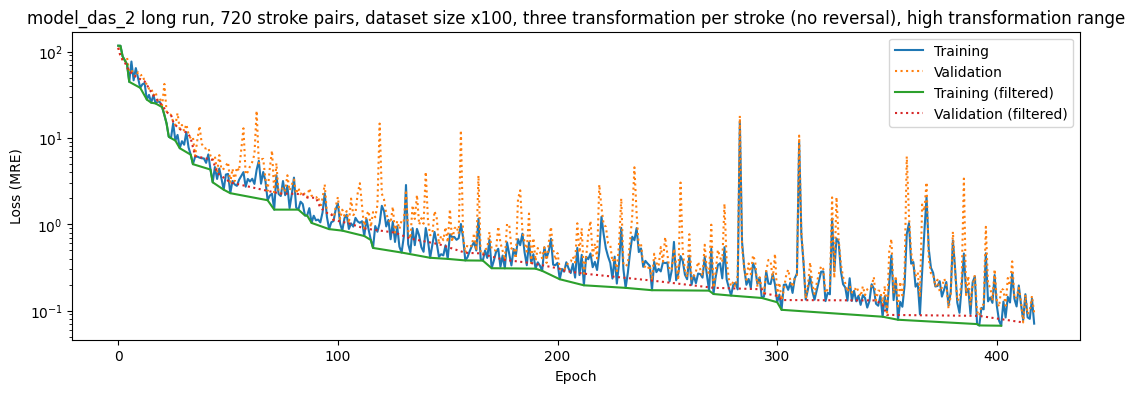

In [18]:
loss_das_last = pd.read_csv("../data/losses/csv/loss_das_2_0.csv", sep=', ', header=0, engine='python')

loss_das = plt.figure(figsize=(13, 4))
loss_das.tight_layout(pad=2.0)
ax = loss_das.add_subplot(111)

loss_das_last_train = loss_das_last['loss_train'].tolist()
ax.plot(np.arange(len(loss_das_last_train)), loss_das_last_train, label='Training')
loss_das_last_valid = loss_das_last['loss_valid'].tolist()
ax.plot(np.arange(len(loss_das_last_valid)), loss_das_last_valid, label='Validation', ls='dotted')
dx, loss_das_last_train = filterData(loss_das_last['loss_train'].tolist())
ax.plot(dx, loss_das_last_train, label='Training (filtered)')
dx, loss_das_last_valid = filterData(loss_das_last['loss_valid'].tolist())
ax.plot(dx, loss_das_last_valid, label='Validation (filtered)', ls='dotted')
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MRE)')
ax.set_title('model_das_2 long run, 720 stroke pairs, dataset size x100, three transformation per stroke (no reversal), high transformation range')

plt.savefig('./loss_das_last.png')
plt.show()